<a href="https://colab.research.google.com/github/ianblum/Coderhouse/blob/main/Proyecto_final_sentimientos_0_93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La Cuantificación de las Emociones Humanas a Través del Lenguaje: Un Enfoque desde el Procesamiento del Lenguaje Natural y la Inteligencia Artificial

### Introducción.

Bienvenido al conjunto de datos "Emociones", una colección cuidadosamente curada de mensajes de Twitter en inglés, cada uno etiquetado con una de seis emociones fundamentales: ira, miedo, alegría, amor, tristeza y sorpresa.

Este conjunto de datos proporciona una base sólida para el análisis del lenguaje emocional en redes sociales, facilitando estudios en procesamiento de lenguaje natural (PLN), análisis de sentimientos y clasificación de emociones. Gracias a su estructura y anotación detallada, es una herramienta valiosa para comprender cómo se expresan las emociones en textos cortos dentro del ecosistema digital.

### Acerca del conjunto de datos.

Cada entrada de este conjunto de datos consta de:

Un mensaje de Twitter en inglés, representando una expresión natural del lenguaje en redes sociales.
Una etiqueta de emoción, que indica la categoría emocional predominante en el mensaje.
Las emociones se encuentran clasificadas en seis categorías, cada una representada por un valor numérico:

* Tristeza (0)
* Alegría (1)
* Amor (2)
* Ira (3)
* Miedo (4)
* Sorpresa (5)

### Metodología de anotación
Las etiquetas emocionales han sido asignadas mediante un proceso de anotación manual por expertos en lingüística y análisis de sentimientos, garantizando una alta calidad en la categorización. Para mejorar la precisión, las anotaciones han sido validadas mediante un proceso de consenso, asegurando que cada mensaje refleje la emoción más adecuada.

### Aplicaciones y usos
Este conjunto de datos es ideal para investigadores y desarrolladores interesados en:

* Clasificación de emociones en textos breves.

* Entrenamiento de modelos de PLN para reconocer emociones en lenguaje natural.

* Minería de textos y análisis de sentimientos en redes sociales.

* Desarrollo de chatbots y asistentes virtuales con mayor sensibilidad emocional.


Gracias a su estructura bien definida y su anotación precisa, "Emociones" es una herramienta poderosa para explorar la dimensión emocional del lenguaje en el entorno digital.

## Visión General y Alcance del Proyecto

### ¿Es posible medir lo intangible?
Las emociones han sido, desde siempre, un fenómeno elusivo. Se sienten, se expresan, pero rara vez se pueden capturar con precisión absoluta. La palabra escrita es una de las herramientas más poderosas con las que el ser humano ha intentado representar lo que siente, pero ¿hasta qué punto es posible traducir esas emociones en datos concretos?

Este proyecto se sitúa en la intersección entre la filosofía del lenguaje, la inteligencia artificial y la ciencia de datos, explorando la posibilidad de cuantificar las emociones humanas a partir del lenguaje escrito. A través del procesamiento de lenguaje natural (PLN), abordamos el desafío de transformar el subjetivo mundo emocional en representaciones estructuradas y numéricas.

### La paradoja del lenguaje y la emoción
El lenguaje es, al mismo tiempo, una ventana y una limitación. Nos permite externalizar nuestros sentimientos, pero a costa de simplificarlos en etiquetas y categorías finitas. Decimos "estoy feliz" o "siento miedo", pero en realidad, esas palabras son solo aproximaciones a una realidad emocional mucho más rica y compleja.

La inteligencia artificial no tiene emociones, pero puede aprender a reconocer patrones en la forma en que los humanos las comunican. Este estudio se basa en un conjunto de datos de mensajes en redes sociales etiquetados con seis emociones fundamentales: ira, miedo, alegría, amor, tristeza y sorpresa. Mediante modelos de aprendizaje automático, buscamos descubrir qué estructuras lingüísticas están más fuertemente asociadas con cada emoción, permitiendo a la IA interpretar y predecir estados emocionales basándose en el texto.

###  Objetivos y alcance
El propósito de este trabajo es doble:

* Técnico: Diseñar y evaluar modelos de PLN capaces de identificar y clasificar emociones en textos cortos, contribuyendo a aplicaciones como análisis de sentimientos, chatbots emocionales y sistemas de monitoreo de redes sociales.

* Filosófico (muy personal): Reflexionar sobre las implicaciones de reducir la emoción humana a una representación computacional. ¿Es la inteligencia artificial un espejo del lenguaje humano, o solo un eco distorsionado de nuestra manera limitada de expresar sentimientos?
Este estudio invita al lector a cuestionar no solo el alcance del PLN y la IA en la detección de emociones, sino también la naturaleza misma del lenguaje como vehículo de la experiencia humana. ¿Podremos algún día capturar la riqueza infinita de las emociones en un modelo de datos, o estamos condenados a etiquetar lo inefable?

El presente trabajo no solo busca respuestas, sino también abrir nuevas preguntas sobre la relación entre la mente humana y la máquina.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import json
import numpy as np # Recursos álgebra lineal
import pandas as pd # Recursos de datos, CSV file en este caso
import matplotlib.pyplot as plt
import seaborn as sns
# Recursos Word Cloud
from wordcloud import WordCloud
# Recursos textacy
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
# Importar bibliotecas básicas nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# Recursos NLTK
nltk.download('punkt')
nltk.download('stopwords')
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Subir el archivo de texto
from google.colab import files

uploaded = files.upload()
texto_file = list(uploaded.keys())[0]

Saving text.csv to text.csv


# 1- Carga y Preprocesamiento Inicial del Dataset

Este código se encarga de la carga, limpieza y organización inicial del dataset, preparando los datos para su posterior análisis y entrenamiento en modelos de Machine Learning o Deep Learning.

* Cargar el Dataset
* Verificar la Estructura del Dataset
* Manejo de Valores Nulos y Duplicados
* Renombrar Columnas para Mayor Claridad
* Eliminación de Columnas Innecesarias
* Renombrar las Etiquetas de Emoción
* Contar la Distribución de Etiquetas

### Conclusión
Este código:
* Carga y organiza los datos de manera eficiente.
* Limpia y estandariza las columnas.
* Renombra etiquetas para mejor interpretación.
* Verifica datos faltantes o duplicados.
* Analiza la distribución de emociones para detectar posibles desbalances.

Este paso es crucial antes de realizar cualquier análisis o entrenamiento de modelos.

In [ ]:
# Cargar el dataset
df = pd.read_csv('/content/text.csv')
df.head()

# Forma de los datos
print(f'La forma de los datos es : {df.shape}')

# Valores nulos
df.isnull().sum()

# Valores duplicados
df.duplicated().sum()

# Renombrar columnas
df.rename(columns={'text': 'Texto', 'label': 'Etiqueta'}, inplace=True)
# Eliminación de las columnas
df.drop('Unnamed: 0',axis=1,inplace=True)

# Primeras filas del objeto
df.head()

# Renombrar también la etiqueta {0: 'tristeza', 1: 'alegría', 2: 'amor', 3: 'ira', 4: 'miedo', 5: 'sorpresa'}.
df['Etiqueta'] = df['Etiqueta'].replace(0,'Tristeza')
df['Etiqueta'] = df['Etiqueta'].replace(1,'Alegría')
df['Etiqueta'] = df['Etiqueta'].replace(2,'Amor')
df['Etiqueta'] = df['Etiqueta'].replace(3,'Ira')
df['Etiqueta'] = df['Etiqueta'].replace(4,'Miedo')
df['Etiqueta'] = df['Etiqueta'].replace(5,'Sorpresa')

# Recuento de valores de la etiqueta
count = df['Etiqueta'].value_counts()

La forma de los datos es : (416809, 3)


# 2 - Exploración de datos
Este código realiza un análisis exploratorio de datos (EDA) mediante gráficos de distribución y nubes de palabras para entender mejor la distribución de emociones en el dataset.

* Gráficos de Distribución de Categorías (Gráfico Circular y Gráfico de Barras)
* Creación de Conjuntos de Datos por Categoría
* Generación de Nubes de Palabras
* Visualización de Nubes de Palabras

### Conclusión
Este código permite analizar visualmente la distribución de emociones en el dataset con gráficos circulares y de barras.
Entender mejor el contenido textual de cada categoría con nubes de palabras.
Facilitar la interpretación de los datos antes del entrenamiento del modelo, ayudando a detectar sesgos o desbalances en las emociones.

* Este análisis exploratorio es clave antes de entrenar un modelo de clasificación de texto, ya que proporciona información sobre cómo están distribuidos los datos y qué patrones predominan en cada emoción.

<ipython-input-4-0a8d7050e5f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


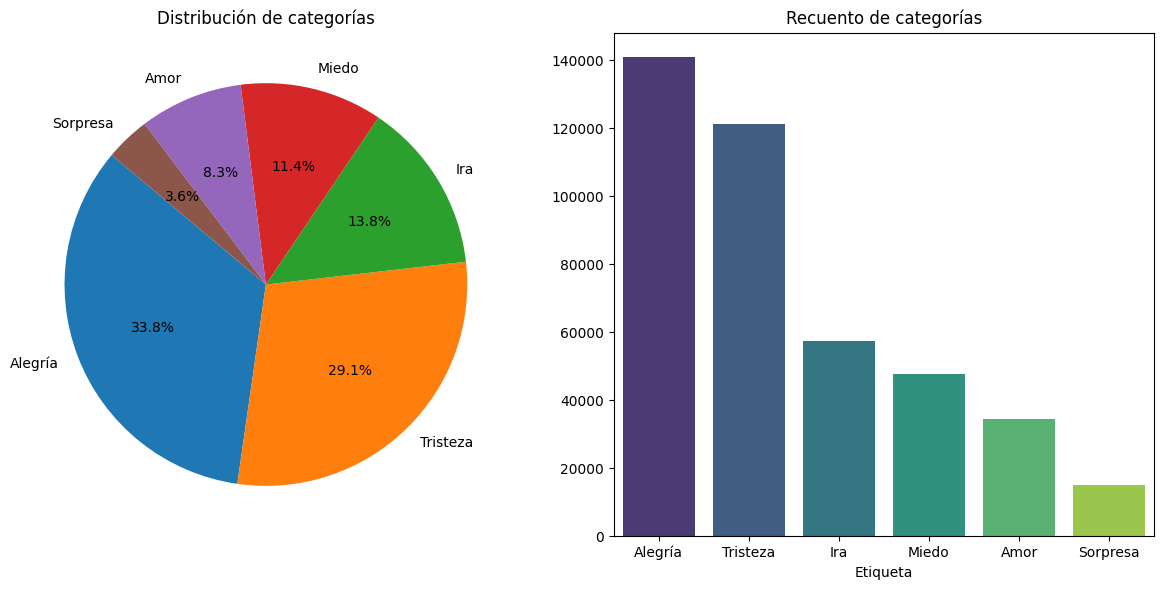

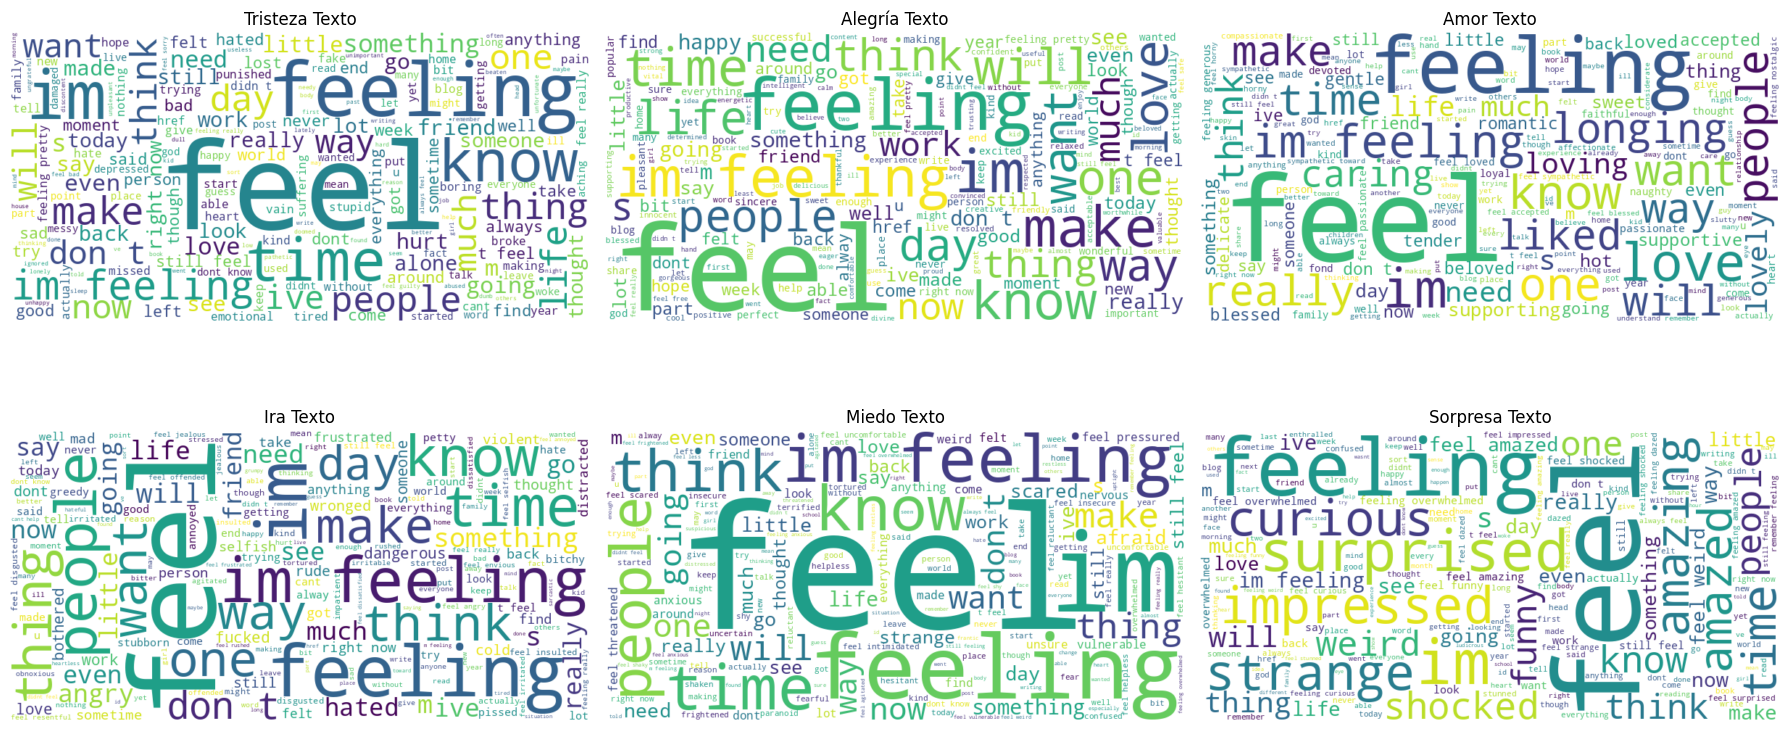

In [ ]:
# Crear una figura con dos subtramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Trazar gráfico circular
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribución de categorías')

# Trazar gráfico de barras
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Recuento de categorías')

# Ajustar el diseño
plt.tight_layout()

# Mostrar
plt.show()

# Hacer un conjunto de datos separado para visualizar el texto
# Tristeza
df_sadness = df[df['Etiqueta']=='Tristeza']
# Alegría
df_joy = df[df['Etiqueta']=='Alegría']
# Amor
df_love = df[df['Etiqueta']=='Amor']
# Ira
df_anger = df[df['Etiqueta']=='Ira']
# Miedo
df_fear = df[df['Etiqueta']=='Miedo']
# Sorpresa
df_surprise = df[df['Etiqueta']=='Sorpresa']

# Combinar texto de diferentes categorías
combined_tristeza_text = ' '.join(df_sadness['Texto'])
combined_alegria_text = ' '.join(df_joy['Texto'])
combined_amor_text = ' '.join(df_love['Texto'])
combined_ira_text = ' '.join(df_anger['Texto'])
combined_miedo_text = ' '.join(df_fear['Texto'])
combined_sorpresa_text = ' '.join(df_surprise['Texto'])

# Crear nubes de palabras
tristeza_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_tristeza_text)
alegria_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_alegria_text)
amor_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_amor_text)
ira_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_ira_text)
miedo_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_miedo_text)
sorpresa_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sorpresa_text)

# Trazar las nubes de palabras
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(tristeza_wordcloud, interpolation='bilinear')
plt.title('Tristeza Texto')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(alegria_wordcloud, interpolation='bilinear')
plt.title('Alegría Texto')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(amor_wordcloud, interpolation='bilinear')
plt.title('Amor Texto')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(ira_wordcloud, interpolation='bilinear')
plt.title('Ira Texto')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(miedo_wordcloud, interpolation='bilinear')
plt.title('Miedo Texto')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(sorpresa_wordcloud, interpolation='bilinear')
plt.title('Sorpresa Texto')
plt.axis('off')

plt.tight_layout()
plt.show()

# 3- Limpieza y Preprocesamiento de Texto
Este código se enfoca en preprocesar y limpiar el texto antes de ser utilizado en modelos de Machine Learning o Deep Learning. La limpieza de datos es un paso fundamental para mejorar la calidad de los modelos y evitar ruido en el entrenamiento.

* Eliminación de URLs
* Eliminación de Caracteres Especiales y Puntuación
* Eliminación de Espacios en Blanco Extra
* Eliminación de Números
* Conversión del Texto a Minúsculas
* Eliminación de Palabras Vacías (Stopwords)
* Eliminación de Caracteres No Alfanuméricos
* Guardado del Dataset Limpio

In [ ]:
# Remover URLs
df['Texto'] = df['Texto'].str.replace(r'http\S+', '', regex=True)

# Visualice las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Eliminar caracteres especiales y signos de puntuación
df['Texto'] = df['Texto'].str.replace(r'[^\w\s]', '', regex=True)

# Visualice las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Eliminar los espacios en blanco sobrantes
df['Texto'] = df['Texto'].str.replace(r'\s+', ' ', regex=True)

# Visualice las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Eliminar valores numéricos
df['Texto'] = df['Texto'].str.replace(r'\d+', '', regex=True)

# Primeras filas del objeto
df.head()

# Minúsculas
df['Texto'] = df['Texto'].str.lower()

# Visualice las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Eliminar palabras vacías
stop = stopwords.words('english')
df["Texto"] = df['Texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Visualice las primeras filas del DataFrame para verificar los cambios
df.head()

# Eliminar caracteres no alfanuméricos de la columna -Texto
df['Texto'] = df['Texto'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Guardar el dataset limpio en un nuevo archivo CSV
df.to_csv("/content/text_cleaned.csv", index=False, encoding='utf-8')

print("Dataset limpio guardado como 'text_cleaned.csv'")


                                               Texto  Etiqueta
0      i just feel really helpless and heavy hearted     Miedo
1  ive enjoyed being able to slouch about relax a...  Tristeza
2  i gave up my internship with the dmrg and am f...     Miedo
3                         i dont know i feel so lost  Tristeza
4  i am a kindergarten teacher and i am thoroughl...     Miedo
                                               Texto  Etiqueta
0      i just feel really helpless and heavy hearted     Miedo
1  ive enjoyed being able to slouch about relax a...  Tristeza
2  i gave up my internship with the dmrg and am f...     Miedo
3                         i dont know i feel so lost  Tristeza
4  i am a kindergarten teacher and i am thoroughl...     Miedo
                                               Texto  Etiqueta
0      i just feel really helpless and heavy hearted     Miedo
1  ive enjoyed being able to slouch about relax a...  Tristeza
2  i gave up my internship with the dmrg and am f...   

# 4- Preprocesamiento de Texto con Tokenización y TF-IDF
Este código se encarga de preparar el texto para su posterior uso en modelos de Machine Learning o Deep Learning. Combina dos técnicas clave para representar el texto de manera numérica:

* Separación en entrenamiento (X_train) y prueba (X_test) y tokenización con NLTK.
* Tokenización + Padding para usar en redes neuronales.
* Guardar el tokenizer entrenado
* TF-IDF para modelos de Machine Learning tradicionales.

### Carga del Dataset
* Se carga el dataset limpio desde text_cleaned.csv.
* Se verifica la estructura del dataset con print(df.head()) para asegurar que se cargó correctamente.

### División en Características (X) y Etiquetas (y)
* X = df['Texto'] extrae la columna de texto.
* y = df['Etiqueta'] extrae la etiqueta asociada a cada texto.
* Se divide en conjunto de entrenamiento (80%) y prueba (20%) usando train_test_split().

### Manejo de Datos Faltantes y Formato del Texto
* Se reemplazan valores nulos en X_train y X_test por una cadena vacía "", para evitar errores en el procesamiento.
* Se convierten a str para asegurarse de que todos los textos sean procesables.

### Tokenización del Texto
* Se inicializa un tokenizer de Keras con num_words=50000, lo que significa que solo se considerarán las 50,000 palabras más frecuentes.
* Se ajusta el tokenizer al conjunto de entrenamiento y prueba.
* Se convierten los textos en secuencias numéricas (texts_to_sequences()), donde cada palabra es reemplazada por un índice único.

### Guardado del Tokenizer
* Para futuras predicciones sin necesidad de volver a tokenizar el texto, se guarda el tokenizer en un archivo tokenizer.pkl.

### Padding de Secuencias

* Se determina la longitud máxima maxlen, que es el tamaño del texto más largo en la base de entrenamiento.
* Se realiza padding, asegurando que todas las secuencias tengan la misma longitud maxlen al rellenarlas con ceros (padding='post').

### Aplicación de TF-IDF
* Se crea un vectorizador TF-IDF con max_features=5000, que selecciona las 5000 palabras más importantes.
* Se transforma X_train y X_test en representaciones TF-IDF, donde cada texto es convertido en una matriz de frecuencias ponderadas de palabras.

### Conclusión
Este código prepara los datos de texto para que puedan ser usados tanto en modelos tradicionales de Machine Learning (TF-IDF + SVM, Random Forest, etc.) como en modelos de Deep Learning (Tokenización + Padding para LSTM, GRU, BiGRU, etc.).

* Si se usa Machine Learning: Se empleará la matriz TF-IDF X_train_tfidf y X_test_tfidf.
* Si se usa Deep Learning: Se empleará X_train_padded y X_test_padded.


In [ ]:
# Cargando librerias nuevamente (costumbre)
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar el dataset limpio
df = pd.read_csv("/content/text_cleaned.csv")

# Verificar la estructura del dataset
print(df.head())

# Separar características (X) y etiquetas (y)
X = df['Texto']
y = df['Etiqueta']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar dimensiones de los conjuntos
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Asegurar que solo haya strings en los textos
X_train = X_train.fillna("").astype(str)
X_test = X_test.fillna("").astype(str)

# Tokenización del texto
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Guardar el tokenizer entrenado
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("Tokenizer guardado correctamente en tokenizer.pkl")

# Determinar la longitud máxima de secuencia
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

# Padding de secuencias
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

print("Padding completado")

# Puesta a punto del texto (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF aplicado correctamente")

                                               Texto  Etiqueta
0                 feel really helpless heavy hearted     Miedo
1  ive enjoyed able slouch relax unwind frankly n...  Tristeza
2            gave internship dmrg feeling distraught     Miedo
3                                dont know feel lost  Tristeza
4  kindergarten teacher thoroughly weary job take...     Miedo
X_train shape: (333447,)
X_test shape: (83362,)
y_train shape: (333447,)
y_test shape: (83362,)
Tokenizer guardado correctamente en tokenizer.pkl
Maximum sequence length (maxlen): 79
Padding completado
TF-IDF aplicado correctamente


NO EJECUTAR, CODIGO IGUAL AL ANTERIOR, PERO REALIZADO CON EL DATASET ORIGEN, EL ANTERIOR USA text_cleaned.csv que seria el DATASET LIMPIO

In [ ]:
# Asegurar que 'Texto' no tenga valores NaN y sea string
df['Texto'].fillna("", inplace=True)  # Reemplazar NaN con cadenas vacías
df['Texto'] = df['Texto'].astype(str)  # Convertir a string

# Asignar X e Y
X = df['Texto']
y = df['Etiqueta']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evitar errores en tokenización: Convertir NaN a " " y asegurarse de que sean strings
X_train = X_train.fillna("").astype(str)
X_test = X_test.fillna("").astype(str)

# Tokenización del texto
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Guardar el tokenizer entrenado
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("Tokenizer guardado correctamente en tokenizer.pkl")

# Padding
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Verificar formas de los datos después del padding
print("X_train_padded shape:", X_train_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)


Tokenizer guardado correctamente en tokenizer.pkl
Maximum sequence length (maxlen): 79
X_train_padded shape: (333447, 79)
X_test_padded shape: (83362, 79)


# 5- Entrenamiento Incremental con SGDClassifier y TF-IDF
Este código implementa un entrenamiento incremental de un modelo de clasificación de texto utilizando SGDClassifier (Stochastic Gradient Descent Classifier) y TF-IDF (Term Frequency-Inverse Document Frequency) para transformar el texto en vectores numéricos. Su objetivo es entrenar un modelo de manera eficiente sin cargar todo el dataset en memoria, lo que es útil para datasets grandes.

### Carga y Preprocesamiento del Dataset
* Se carga el dataset limpio desde text_cleaned.csv.
* Se eliminan valores nulos en la columna Texto para evitar errores en la tokenización.
* Se asegura que la columna Texto tenga valores de tipo str para evitar problemas en la vectorización.

### Inicialización de Componentes Clave
* Se configura un vectorizador TF-IDF con max_features=5000, lo que significa que solo se considerarán las 5000 palabras más frecuentes.
* Se inicializa un SGDClassifier con una función de pérdida "hinge", que equivale a un SVM lineal pero optimizado con descenso de gradiente estocástico.

### Primera Pasada: Ajuste del Vocabulario del TF-IDF
`El código procesa el dataset en batches de 10,000 muestras, lo que permite manejar datasets grandes sin sobrecargar la RAM.`

* Se recorre el dataset en pequeños fragmentos (chunks).
En cada fragmento, se eliminan valores nulos y se convierte Texto a string.
* Se ajusta el vocabulario del TF-IDF, es decir, se identifican las palabras más importantes del conjunto de datos.

### Segunda Pasada: Entrenamiento del Modelo en Lotes

* Se vuelve a recorrer el dataset en chunks.
* Cada fragmento se transforma en una matriz de características usando el TF-IDF ya ajustado.
* Se mezclan los datos para evitar sobreajuste por el orden del dataset.
* Se entrena el modelo de manera incremental con partial_fit(), permitiendo que el modelo procese grandes volúmenes de datos sin necesidad de almacenar todo en memoria.

### Evaluación del Modelo
* Se toma un subconjunto de 10,000 muestras del dataset como conjunto de prueba.
* Se transforma el texto de prueba con TF-IDF.
* Se predicen las etiquetas y se calcula la precisión del modelo (accuracy_score).

### Guardado del Modelo y Vectorizador
Para futuras predicciones sin necesidad de reentrenar el modelo desde cero:

* Se guarda el modelo entrenado (sgd_model.pkl).
* Se guarda el vectorizador TF-IDF (vectorizer.pkl).

### Conclusión
Este código permite entrenar un modelo de clasificación de emociones en texto de forma eficiente, utilizando procesamiento por lotes para evitar problemas de memoria. Además, deja preparado el modelo y el vectorizador para ser usados en futuras predicciones.


In [ ]:
# Cargando librerias nuevamente (costumbre)
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Parámetros
batch_size = 10000
ruta_dataset_limpio = "/content/text_cleaned.csv"  # Asegúrate de que este archivo existe

# Cargar el dataset limpio
df = pd.read_csv(ruta_dataset_limpio)

# Verificar que las columnas sean correctas
print("Columnas del dataset:", df.columns)

# Eliminar valores nulos
df.dropna(subset=['Texto'], inplace=True)  # Elimina filas con Texto nulo
df['Texto'] = df['Texto'].astype(str)  # Asegurar que sean strings

# Inicializar vectorizador TF-IDF en modo incremental
vectorizer = TfidfVectorizer(max_features=5000)

# Inicializar clasificador SVM incremental
sgd_model = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, tol=1e-3)

# Primera pasada: Ajustar el vocabulario del TF-IDF
chunk_reader = pd.read_csv(ruta_dataset_limpio, chunksize=batch_size)
for chunk in chunk_reader:
    chunk.dropna(subset=['Texto'], inplace=True)  # Eliminar nulos en cada chunk
    chunk['Texto'] = chunk['Texto'].astype(str)  # Convertir a string en cada chunk
    vectorizer.fit(chunk["Texto"])  # Ajusta el vocabulario solo una vez

# Segunda pasada: Entrenar modelo en lotes
chunk_reader = pd.read_csv(ruta_dataset_limpio, chunksize=batch_size)
for chunk in chunk_reader:
    chunk.dropna(subset=['Texto'], inplace=True)  # Asegurar que no haya nulos
    chunk['Texto'] = chunk['Texto'].astype(str)  # Convertir a string

    X_tfidf = vectorizer.transform(chunk["Texto"]).toarray()
    y = chunk["Etiqueta"].values

    # Mezclar datos para evitar sobreajuste por orden del dataset
    X_tfidf, y = shuffle(X_tfidf, y)

    # Entrenar modelo de manera incremental
    sgd_model.partial_fit(X_tfidf, y, classes=np.unique(y))

# Evaluar modelo en un lote de prueba
test_chunk = pd.read_csv(ruta_dataset_limpio, nrows=10000)  # Usar un subconjunto pequeño para test
test_chunk.dropna(subset=['Texto'], inplace=True)  # Asegurar que no haya nulos
test_chunk['Texto'] = test_chunk['Texto'].astype(str)  # Convertir a string

X_test = vectorizer.transform(test_chunk["Texto"]).toarray()
y_test = test_chunk["Etiqueta"].values

y_pred_sgd = sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Precisión del modelo SGDClassifier: {accuracy_sgd:.4f}")

# Guardar el modelo y el vectorizador para futuras predicciones
import pickle

with open("sgd_model.pkl", "wb") as f:
    pickle.dump(sgd_model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("Modelo y vectorizador guardados correctamente.")

Columnas del dataset: Index(['Texto', 'Etiqueta'], dtype='object')
Precisión del modelo SGDClassifier: 0.9013
Modelo y vectorizador guardados correctamente.


**Aunque mi idea original era esta:**

## Modelo Tradicional → Support Vector Machine (SVM) o Random Forest usando TF-IDF.


- **NO EJECUTAR EL CODIGO, PROBLEMAS DE RAM**

#### ¿Cual fue mi idea inicial?
`Este código se encarga de convertir texto en características numéricas y entrenar dos modelos de Machine Learning para la clasificación de emociones: SVM (Support Vector Machine) y Random Forest. Se evalúa la precisión de cada modelo para comparar su rendimiento.`

* Conversión del Texto a Vectores TF-IDF
* División en Conjuntos de Entrenamiento y Prueba
* **Entrenamiento de un Modelo SVM**

**¿Por qué usar SVM?**

`Es eficaz en problemas de clasificación con datos textuales y funciona bien en espacios de alta dimensión como los generados por TF-IDF.`
* Evaluación del Modelo SVM
* **Entrenamiento de un Modelo Random Forest**
* Evaluación del Modelo Random Forest

**¿Por qué usar Random Forest?**

`Es robusto ante el sobreajuste porque promedia múltiples árboles de decisión y captura relaciones no lineales en los datos.`


**Repito, NO EJECUTAR EL CODIGO, PROBLEMAS DE RAM**

In [ ]:
# Cargando librerias nuevamente (costumbre)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Convertir texto en vectores TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Texto']).toarray()
y = df['Etiqueta']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Entrenar un modelo SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Evaluar SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo SVM: {accuracy_svm:.4f}")

# Entrenar un modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del modelo Random Forest: {accuracy_rf:.4f}")


# 6- Entrenamiento de un Modelo LSTM

* Carga y Preprocesamiento del Dataset

* Codificación de Etiquetas (Label Encoding)

`Convierte las etiquetas de texto (como "Tristeza", "Alegría") en valores numéricos, facilitando su uso en la red neuronal.`

* Tokenización y Conversión a Secuencias

`Tokeniza el texto (convierte palabras en números), limita el vocabulario a 50,000 palabras (num_words=50000) y guarda el tokenizer en tokenizer.pkl para futuras predicciones. Ademas convierte el texto en secuencias numéricas, donde cada palabra se representa con un número único.`

* Padding (Normalización de Longitud de Texto)

`Establece una longitud máxima de 100 palabras (maxlen=100) por texto y añade ceros (padding) si un texto es más corto y corta palabras si es más largo.`

* División en Entrenamiento y Prueba

`Divide el dataset en 80% para entrenamiento y 20% para prueba (test_size=0.2) y usa random_state=42 para asegurar que los resultados sean reproducibles.`

* Implementación de Batch Processing

`Las ventajas de esto son que reduce uso de memoria RAM, acelera el entrenamiento al procesar datos en lotes y evita bloqueos en la GPU/CPU al pre-cargar datos.`

* Construcción de la Red Neuronal LSTM
* Compilación y Entrenamiento del Modelo
* Evaluación del Modelo
* Guardado del Modelo Entrenado

In [ ]:
# Cargando librerias nuevamente (costumbre)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle

# Cargar el dataset limpio
df = pd.read_csv("text_cleaned.csv")

# Eliminar valores nulos en 'Texto' y asegurarse de que sean strings
df.dropna(subset=['Texto'], inplace=True)  # Eliminar filas con NaN en 'Texto'
df['Texto'] = df['Texto'].astype(str)  # Convertir todos los valores a string

# Convertir etiquetas a valores numéricos
encoder = LabelEncoder()
df['Etiqueta'] = encoder.fit_transform(df['Etiqueta'])

# Tokenización y Conversión a Secuencias
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(df['Texto'])

# Guardar el tokenizer para futuras predicciones
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Convertir texto a secuencias
X_sequences = tokenizer.texts_to_sequences(df['Texto'])

# Padding (limitar a 100 palabras para optimizar memoria)
maxlen = 100
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')

# División en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['Etiqueta'], test_size=0.2, random_state=42)

# Configuración de Batch Processing
BATCH_SIZE = 512
BUFFER_SIZE = 10000

# Convertir datos a Dataset de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Construcción de la Red LSTM
model = Sequential([
    Embedding(input_dim=50000, output_dim=128, input_length=maxlen),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(6, activation="softmax")  # 6 emociones
])

# Compilar modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenar el Modelo con Batch Processing
model.fit(train_dataset, epochs=5, validation_data=test_dataset)

# Evaluar el modelo
loss, accuracy_lstm = model.evaluate(test_dataset)
print(f"Precisión del modelo LSTM: {accuracy_lstm:.4f}")

# Guardar el Modelo Entrenado
model.save("modelo_emociones.h5")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


652/652 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.3298 - loss: 1.5896 - val_accuracy: 0.3385 - val_loss: 1.5713
Epoch 2/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3390 - loss: 1.5761 - val_accuracy: 0.3385 - val_loss: 1.5714
Epoch 3/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3394 - loss: 1.5742 - val_accuracy: 0.3385 - val_loss: 1.5711
Epoch 4/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3392 - loss: 1.5739 - val_accuracy: 0.3385 - val_loss: 1.5726
Epoch 5/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3392 - loss: 1.5738 - val_accuracy: 0.3385 - val_loss: 1.5711
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3345 - loss: 1.5725


Precisión del modelo LSTM: 0.3385


# 6- Implementación de un Modelo LSTM Optimizado para la Clasificación de Emociones en Texto

Este código intenta entrenar una red neuronal LSTM optimizada para la clasificación de emociones en texto. Se han implementado mejoras clave en preprocesamiento, balanceo de datos, optimización de memoria y tuning de hiperparámetros para mejorar el rendimiento de la red neuronal anteriormente planteada, no voy a dar detalles como en el apartado anterior pero los pasos realizados fueron:

* Carga y Preprocesamiento del Dataset
* Mejora del Preprocesamiento
* Balanceo de Clases para Evitar Sesgos
* Codificación de Etiquetas
* Reducción del Tamaño del Vocabulario para Mayor Eficiencia
* Conversión de Texto a Secuencias y Padding
* División en Conjunto de Entrenamiento y Prueba
* Implementación de Batch Processing
* Construcción de la Red LSTM Optimizada
* Compilación y Entrenamiento del Modelo
* Evaluación del Modelo
* Guardado del Modelo Optimizado

### ¿Qué mejoras se implementaron?
* Mejor preprocesamiento (evita eliminar puntuación importante).
* Balanceo de clases (evita sesgo en clases minoritarias).
* Reducción de vocabulario (50,000 → 10,000 palabras para optimizar RAM).
* Mayor capacidad de memoria LSTM (64 → 128 unidades).
* Entrenamiento con más épocas (5 → 10).
* Uso de Batch Processing (lotes de 512 muestras para eficiencia).

**SPOILER: NO funciono**


In [ ]:
# Cargando librerias nuevamente (costumbre)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle

# Cargar el dataset limpio
df = pd.read_csv("text_cleaned.csv")

# Eliminar valores nulos en 'Texto' y asegurarse de que sean strings
df.dropna(subset=['Texto'], inplace=True)  # Eliminar filas con NaN en 'Texto'
df['Texto'] = df['Texto'].astype(str)  # Convertir todos los valores a string

# Aplicar Preprocesamiento Mejorado (Evitar eliminación de signos de puntuación importantes)
df['Texto'] = df['Texto'].str.replace(r'[^a-zA-Z\s!?.,]', '', regex=True)  # Mantener signos clave

# Balanceo de Clases para evitar sesgos
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(df[['Texto']], df['Etiqueta'])
df = pd.DataFrame({'Texto': X_resampled['Texto'], 'Etiqueta': y_resampled})  # Convertir a nuevo df balanceado

# Convertir etiquetas a valores numéricos
encoder = LabelEncoder()
df['Etiqueta'] = encoder.fit_transform(df['Etiqueta'])

# Reducir tamaño del vocabulario para mejorar eficiencia
tokenizer = Tokenizer(num_words=10000)  # Reducido de 50,000 → 10,000 palabras para evitar RAM alta
tokenizer.fit_on_texts(df['Texto'])

# Guardar el tokenizer para futuras predicciones
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Convertir texto a secuencias
X_sequences = tokenizer.texts_to_sequences(df['Texto'])

# Padding (limitar a 100 palabras para optimizar memoria)
maxlen = 100
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')

# División en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['Etiqueta'], test_size=0.2, random_state=42)

# Configuración de Batch Processing
BATCH_SIZE = 512
BUFFER_SIZE = 10000

# Convertir datos a Dataset de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Construcción de la Red LSTM Optimizada
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),  # Reducido a 10,000 palabras
    LSTM(128, return_sequences=True),  # Aumentamos unidades LSTM (64 → 128)
    LSTM(128),
    Dense(128, activation="relu"),  # Aumentamos capa oculta (64 → 128)
    Dropout(0.3),
    Dense(6, activation="softmax")  # 6 emociones
])

# Compilar modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenar el Modelo con Batch Processing
model.fit(train_dataset, epochs=10, validation_data=test_dataset)  # Aumentamos épocas (5 → 10)

# Evaluar el modelo
loss, accuracy_lstm = model.evaluate(test_dataset)
print(f"Precisión del modelo LSTM Optimizado: {accuracy_lstm:.4f}")

# Guardar el Modelo Entrenado
model.save("modelo_emociones_optimizado.h5")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1323/1323 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.1672 - loss: 1.7920 - val_accuracy: 0.1670 - val_loss: 1.7918
Epoch 2/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1666 - loss: 1.7918 - val_accuracy: 0.1670 - val_loss: 1.7918
Epoch 3/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1663 - loss: 1.7918 - val_accuracy: 0.1664 - val_loss: 1.7918
Epoch 4/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1661 - loss: 1.7918 - val_accuracy: 0.1670 - val_loss: 1.7918
Epoch 5/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1662 - loss: 1.7918 - val_accuracy: 0.1664 - val_loss: 1.7918
Epoch 6/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1667 - loss: 1.7918 - val_accuracy: 0.1670 - val_loss: 1.7918
Epoch 7/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1660 - loss: 1.7918 - val_accuracy: 0.1664 - val_loss: 1.7918
Epoch 8/10
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.1660 - loss: 1.79

Precisión del modelo LSTM Optimizado: 0.1664


# 7- Implementación de una Red LSTM con Regularización para la Clasificación de Emociones

Este código (nuevamente) entrena una red neuronal LSTM corregida, optimizada para la clasificación de emociones en textos. Se han aplicado mejoras en el preprocesamiento, regularización y optimización del modelo para mejorar la precisión y evitar el sobreajuste.

* Carga y Preprocesamiento del Dataset
* Mejora del Preprocesamiento
* Codificación de Etiquetas
* Tokenización y Conversión a Secuencias
* Conversión de Texto a Secuencias y Padding
* División en Conjunto de Entrenamiento y Prueba
* Implementación de Batch Processing
* Construcción de la Red LSTM con Regularización
* Compilación y Entrenamiento del Modelo
* Evaluación del Modelo
* Guardado del Modelo Optimizado

### ¿Qué mejoras se implementaron?

* Mantenimiento de signos de puntuación clave.
* Mayor regularización con dropout en LSTM para evitar sobreajuste.
* Uso de 50,000 palabras en el vocabulario para mejorar la comprensión.
* Batch Processing eficiente (512 muestras por lote).
* Menor riesgo de sobreajuste con 7 épocas en vez de 5 o 10.

**SPOILER: NO funciono, pero mejore lo anterior aunque el porcentaje aun sea bajo**

In [ ]:
# Cargando librerias nuevamente (costumbre)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle

# Cargar el dataset limpio
df = pd.read_csv("text_cleaned.csv")

# Eliminar valores nulos en 'Texto' y asegurarse de que sean strings
df.dropna(subset=['Texto'], inplace=True)
df['Texto'] = df['Texto'].astype(str)

# Preprocesamiento: Eliminamos caracteres no deseados pero mantenemos puntuación clave
df['Texto'] = df['Texto'].str.replace(r'[^a-zA-Z\s!?.,]', '', regex=True)

# Convertir etiquetas a valores numéricos
encoder = LabelEncoder()
df['Etiqueta'] = encoder.fit_transform(df['Etiqueta'])

# Tokenización y Conversión a Secuencias
tokenizer = Tokenizer(num_words=50000)  # Volvemos a 50,000 palabras
tokenizer.fit_on_texts(df['Texto'])

# Guardar el tokenizer para futuras predicciones
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Convertir texto a secuencias
X_sequences = tokenizer.texts_to_sequences(df['Texto'])

# Padding (limitar a 100 palabras para optimizar memoria)
maxlen = 100
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')

# División en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['Etiqueta'], test_size=0.2, random_state=42)

# Configuración de Batch Processing
BATCH_SIZE = 512
BUFFER_SIZE = 10000

# Convertir datos a Dataset de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Construcción de la Red LSTM Corregida
model = Sequential([
    Embedding(input_dim=50000, output_dim=128, input_length=maxlen),
    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),  # Añadimos regularización
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation="relu"),
    Dropout(0.5),  # Aumentamos Dropout para evitar sobreajuste
    Dense(6, activation="softmax")
])

# Compilar modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenar el Modelo con Batch Processing
model.fit(train_dataset, epochs=7, validation_data=test_dataset)  # Probamos con 7 épocas

# Evaluar el modelo
loss, accuracy_lstm = model.evaluate(test_dataset)
print(f"Precisión del modelo LSTM Corregido: {accuracy_lstm:.4f}")

# Guardar el Modelo Entrenado**
model.save("modelo_emociones_corregido.h5")

Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


652/652 ━━━━━━━━━━━━━━━━━━━━ 325s 486ms/step - accuracy: 0.3198 - loss: 1.6069 - val_accuracy: 0.3385 - val_loss: 1.5713
Epoch 2/7
652/652 ━━━━━━━━━━━━━━━━━━━━ 314s 481ms/step - accuracy: 0.3386 - loss: 1.5786 - val_accuracy: 0.3385 - val_loss: 1.5714
Epoch 3/7
652/652 ━━━━━━━━━━━━━━━━━━━━ 314s 482ms/step - accuracy: 0.3389 - loss: 1.5757 - val_accuracy: 0.3385 - val_loss: 1.5711
Epoch 4/7
652/652 ━━━━━━━━━━━━━━━━━━━━ 315s 484ms/step - accuracy: 0.3384 - loss: 1.5740 - val_accuracy: 0.3385 - val_loss: 1.5711
Epoch 5/7
652/652 ━━━━━━━━━━━━━━━━━━━━ 316s 484ms/step - accuracy: 0.3387 - loss: 1.5735 - val_accuracy: 0.3385 - val_loss: 1.5710
Epoch 6/7
652/652 ━━━━━━━━━━━━━━━━━━━━ 316s 484ms/step - accuracy: 0.3391 - loss: 1.5729 - val_accuracy: 0.3385 - val_loss: 1.5713
Epoch 7/7
652/652 ━━━━━━━━━━━━━━━━━━━━ 315s 483ms/step - accuracy: 0.3389 - loss: 1.5725 - val_accuracy: 0.3385 - val_loss: 1.5712
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.3345 - loss: 1.5726


Precisión del modelo LSTM Corregido: 0.3385


# 8- Implementación de una Red GRU para la Clasificación de Emociones

Este código entrena una red neuronal GRU (Gated Recurrent Unit) optimizada para la clasificación de emociones en textos. Se han aplicado mejoras en el preprocesamiento, optimización del modelo y uso eficiente de memoria. Los pasos ya son viejos conocidos, pero paso a enumerar:

* Carga y Preprocesamiento del Dataset
* Codificación de Etiquetas
* Tokenización y Conversión a Secuencias
* Conversión de Texto a Secuencias y Padding
* División en Conjunto de Entrenamiento y Prueba
* Implementación de Batch Processing
* Construcción de la Red GRU
* Compilación y Entrenamiento del Modelo
* Evaluación del Modelo
* Guardado del Modelo Optimizado

### ¿Qué mejoras se implementaron respecto a los modelos anteriores?
* Uso de GRU en vez de LSTM para mayor eficiencia en tiempo de cómputo.
* Incremento en el tamaño de las capas GRU (128 unidades).
* Regularización con Dropout(0.4) para evitar sobreajuste.
* Uso de Batch Processing para optimizar el uso de memoria.
* Entrenamiento en 8 épocas para un aprendizaje más sólido.

**SPOILER: NO funciono**



In [ ]:
# Cargando librerias nuevamente (costumbre)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle

# Cargar el dataset limpio
df = pd.read_csv("text_cleaned.csv")

# Eliminar valores nulos en 'Texto' y asegurarse de que sean strings**
df.dropna(subset=['Texto'], inplace=True)  # Eliminar filas con NaN en 'Texto'
df['Texto'] = df['Texto'].astype(str)  # Convertir todos los valores a string

# Convertir etiquetas a valores numéricos
encoder = LabelEncoder()
df['Etiqueta'] = encoder.fit_transform(df['Etiqueta'])

# Tokenización y Conversión a Secuencias
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(df['Texto'])

# Guardar el tokenizer para futuras predicciones
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Convertir texto a secuencias
X_sequences = tokenizer.texts_to_sequences(df['Texto'])

# Padding
maxlen = 100  # Fijar longitud de secuencia en 100 para optimizar memoria
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')

# División en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['Etiqueta'], test_size=0.2, random_state=42)

# Configuración de Batch Processing
BATCH_SIZE = 512
BUFFER_SIZE = 10000

# Convertir datos a Dataset de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Construcción del Modelo con GRU
model = Sequential([
    Embedding(input_dim=50000, output_dim=128, input_length=maxlen),
    GRU(128, return_sequences=True),
    GRU(128),
    Dense(128, activation="relu"),
    Dropout(0.4),
    Dense(6, activation="softmax")  # 6 emociones
])

# Compilar modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenar el Modelo con Batch Processing
model.fit(train_dataset, epochs=8, validation_data=test_dataset)  # Aumentamos a 8 épocas

# Evaluar el modelo
loss, accuracy_gru = model.evaluate(test_dataset)
print(f"Precisión del modelo GRU: {accuracy_gru:.4f}")

# Guardar el Modelo Entrenado
model.save("modelo_emociones_GRU.h5")

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


652/652 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.3288 - loss: 1.5918 - val_accuracy: 0.3385 - val_loss: 1.5715
Epoch 2/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3393 - loss: 1.5757 - val_accuracy: 0.3385 - val_loss: 1.5714
Epoch 3/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3389 - loss: 1.5743 - val_accuracy: 0.3385 - val_loss: 1.5713
Epoch 4/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3387 - loss: 1.5743 - val_accuracy: 0.3385 - val_loss: 1.5711
Epoch 5/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3396 - loss: 1.5733 - val_accuracy: 0.3385 - val_loss: 1.5721
Epoch 6/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3387 - loss: 1.5734 - val_accuracy: 0.3385 - val_loss: 1.5711
Epoch 7/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3394 - loss: 1.5729 - val_accuracy: 0.3385 - val_loss: 1.5713
Epoch 8/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3392 - loss: 1.5730 - val_accuracy: 0.33

Precisión del modelo GRU: 0.3385


`*Perdone la informalidad de este fragmento, pero me estaba volviendo loco. No podia conseguir que la precision aumente usando redes neuronales. Tal vez unos de los procedimientos esta mal realizado y tal vez sea poco profesional mostrar los intentos, pero creo que es humano dar a conocer estos intentos porque prueba tambien la busqueda, el estudio y la investigacion hasta conseguir los resultados que uno persigue. Dicho esto y despues de leer unos papers academicos di con una solucion magica.*`

# 9- Implementación de un Modelo Bi-GRU con Embeddings Preentrenados (GloVe) para Clasificación de Emociones


`GloVe (Global Vectors for Word Representation) es un modelo de embeddings de palabras desarrollado por Stanford. Asocia a cada palabra un vector denso de características (por ejemplo, 100 dimensiones) que captura su significado semántico, entrenado sobre grandes corpus como Wikipedia o Common Crawl.`

Este código implementa una red neuronal basada en Bi-GRU (Bidirectional GRU), utilizando embeddings preentrenados de GloVe para mejorar la representación semántica de los textos y lograr una mayor precisión en la clasificación de emociones.

* Carga y Preprocesamiento del Dataset
* Codificación de Etiquetas
* Tokenización y Conversión a Secuencias
* Conversión de Texto a Secuencias y Padding
* División en Conjunto de Entrenamiento y Prueba
* Carga de Embeddings Preentrenados (GloVe)
* Implementación de Batch Processing
* Construcción del Modelo Bi-GRU con Embeddings GloVe
* Compilación y Entrenamiento del Modelo
* Evaluación del Modelo
* Guardado del Modelo

### ¿Qué mejoras se implementaron?
* Uso de Bi-GRU en vez de LSTM para mayor eficiencia y mejor representación del contexto.
* Incorporación de embeddings preentrenados GloVe para mejorar la comprensión semántica.
* Carga de datos con Batch Processing para optimizar el uso de memoria.
* Uso de Dropout(0.5) para evitar sobreajuste.
* Entrenamiento en 8 épocas para mejorar el aprendizaje.

In [ ]:
# Descarga y Carga de Embeddings Preentrenados (GloVe)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
# Descomprime el archivo para acceder a glove.6B.100d.txt (100 dimensiones)

--2025-03-21 02:20:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-21 02:20:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-21 02:20:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Buscar glove.6B.100d.txt
import os
print(os.listdir())

['.config', 'sgd_model.pkl', 'glove.6B.100d.txt', 'text_cleaned.csv', 'vectorizer.pkl', 'glove.6B.50d.txt', 'glove.6B.200d.txt', 'text.csv', 'tokenizer.pkl', 'modelo_emociones_optimizado.h5', 'modelo_emociones_GRU.h5', 'modelo_emociones.h5', 'modelo_emociones_corregido.h5', 'glove.6B.300d.txt', 'glove.6B.zip', 'sample_data']


In [ ]:
glove_path = "/content/glove.6B.100d.txt"  # Ruta correcta en Google Colab

word_index = tokenizer.word_index
embedding_matrix = np.zeros((50000, 100))
# Abre el archivo de GloVe línea por línea.
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coef = np.asarray(values[1:], dtype="float32")
        if word in word_index and word_index[word] < 50000:
            embedding_matrix[word_index[word]] = coef

In [ ]:
# Cargando librerias nuevamente (costumbre)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle

# Cargar el dataset limpio
df = pd.read_csv("text_cleaned.csv")

# Eliminar valores nulos en 'Texto' y asegurarse de que sean strings
df.dropna(subset=['Texto'], inplace=True)
df['Texto'] = df['Texto'].astype(str)

# Convertir etiquetas a valores numéricos
encoder = LabelEncoder()
df['Etiqueta'] = encoder.fit_transform(df['Etiqueta'])

# Tokenización y Conversión a Secuencias
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(df['Texto'])

# Guardar el tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Convertir texto a secuencias
X_sequences = tokenizer.texts_to_sequences(df['Texto'])

# Padding
maxlen = 100
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')

# División en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['Etiqueta'], test_size=0.2, random_state=42)

# Cargar Embeddings Preentrenados (GloVe)
embedding_dim = 100  # Elegimos 100 dimensiones
embedding_matrix = np.zeros((50000, embedding_dim))

glove_path = "glove.6B.100d.txt"  # Asegúrate de tener este archivo
word_index = tokenizer.word_index

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coef = np.asarray(values[1:], dtype="float32")
        if word in word_index and word_index[word] < 50000:
            embedding_matrix[word_index[word]] = coef

# Batch Processing
BATCH_SIZE = 512
BUFFER_SIZE = 10000

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# Construcción del Modelo con Embeddings Preentrenados y Bi-GRU
model = Sequential([
    Embedding(input_dim=50000, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    Bidirectional(GRU(128, return_sequences=True)),
    Bidirectional(GRU(128)),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(6, activation="softmax")
])

# Compilar modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenar el Modelo
model.fit(train_dataset, epochs=8, validation_data=test_dataset)

# Evaluar el modelo
loss, accuracy_gru = model.evaluate(test_dataset)
print(f"Precisión del modelo Bi-GRU + GloVe: {accuracy_gru:.4f}")

# Guardar el Modelo
model.save("modelo_emociones_BiGRU_GloVe.h5")

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


652/652 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7167 - loss: 0.7575 - val_accuracy: 0.9276 - val_loss: 0.1402
Epoch 2/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9295 - loss: 0.1358 - val_accuracy: 0.9342 - val_loss: 0.1077
Epoch 3/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9369 - loss: 0.1068 - val_accuracy: 0.9377 - val_loss: 0.1001
Epoch 4/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9387 - loss: 0.0966 - val_accuracy: 0.9371 - val_loss: 0.1015
Epoch 5/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9397 - loss: 0.0937 - val_accuracy: 0.9384 - val_loss: 0.0947
Epoch 6/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9407 - loss: 0.0908 - val_accuracy: 0.9373 - val_loss: 0.0982
Epoch 7/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9405 - loss: 0.0893 - val_accuracy: 0.9391 - val_loss: 0.0965
Epoch 8/8
652/652 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9407 - loss: 0.0910 - val_accuracy: 0.93

Precisión del modelo Bi-GRU + GloVe: 0.9389


# ¿Y ahora qué?
Después de completar exitosamente el proceso de entrenamiento del modelo de detección de emociones basado en una red neuronal Bi-GRU con embeddings preentrenados GloVe, surge una pregunta clave:
¿Cómo le doy verdadera utilidad a este modelo?

El entrenamiento por sí solo es valioso, pero un modelo sin interacción real con datos nuevos carece de propósito funcional. La idea central del proyecto es crear un sistema vivo, interactivo y adaptable, que funcione como un "centro de análisis emocional". Este centro tendría la capacidad no solo de predecir emociones humanas a partir de textos, sino también de aprender de cada interacción.

Inspirado en cómo el ser humano procesa información —recibiendo estímulos del entorno, procesándolos internamente y generando respuestas o aprendizajes—, este módulo busca reproducir esa lógica de manera computacional:

`Entrada de datos → Predicción emocional con IA → Almacenamiento de resultados para mejorar el modelo en el futuro.`

### Descripción del Código
El código implementa un sistema interactivo de análisis emocional utilizando el modelo previamente entrenado. Se divide conceptualmente en tres partes:

* **Carga del modelo y recursos necesarios**

* **Predicción de emociones en tiempo real**

* **Almacenamiento para aprendizaje continuo**

*  **Interfaz de entrada continua**


### Conclusión
Este código representa la primera implementación práctica e interactiva del modelo entrenado. Funciona como una interfaz inicial entre el humano y la inteligencia artificial, permitiendo que:

* El usuario explore emociones en textos reales,
* El modelo sea útil en tareas reales (chatbots, análisis de redes sociales, etc.);

Y lo más importante: el sistema pueda retroalimentarse.
La arquitectura es extensible, escalable y fácilmente integrable con futuras funcionalidades como:

* Confirmación humana de emociones,
* Autoetiquetado inteligente,
* Entrenamiento incremental automático.



In [ ]:
# Cargando librerias nuevamente (costumbre)
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv("text_cleaned.csv")

# Inicializar y entrenar el LabelEncoder
encoder = LabelEncoder()
df["Etiqueta"] = encoder.fit_transform(df["Etiqueta"])

# Guardar el LabelEncoder entrenado
np.save("label_encoder.npy", encoder.classes_)
print("LabelEncoder guardado correctamente en label_encoder.npy")

LabelEncoder guardado correctamente en label_encoder.npy


In [ ]:
# Cargar el LabelEncoder guardado
encoder = LabelEncoder()
encoder.classes_ = np.load("label_encoder.npy", allow_pickle=True)

# Función para analizar un nuevo texto
def analizar_texto(nuevo_texto):
    nuevo_texto = nuevo_texto.lower()
    secuencia = tokenizer.texts_to_sequences([nuevo_texto])
    maxlen = 100
    texto_padded = pad_sequences(secuencia, maxlen=maxlen, padding='post')

    # Predecir emoción
    prediccion = modelo.predict(texto_padded)
    emocion_predicha = encoder.inverse_transform([np.argmax(prediccion)])[0]

    print(f"Texto: {nuevo_texto}")
    print(f"Emoción predicha: {emocion_predicha}")

    return nuevo_texto, emocion_predicha

In [ ]:
# Cargando librerias nuevamente (costumbre)
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
import pandas as pd
import os

# Cargar el Modelo ya Entrenado
modelo_path = "/content/modelo_emociones_BiGRU_GloVe.h5"
modelo = load_model(modelo_path)

# Cargar el Tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Cargar el LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.classes_ = np.load("label_encoder.npy", allow_pickle=True)

# Definir función para analizar texto
def analizar_texto(nuevo_texto):
    nuevo_texto = nuevo_texto.lower().strip()  # Minúsculas y limpiar espacios
    secuencia = tokenizer.texts_to_sequences([nuevo_texto])
    maxlen = 100  # Misma longitud usada en el entrenamiento
    texto_padded = pad_sequences(secuencia, maxlen=maxlen, padding='post')

    # Predecir emoción
    prediccion = modelo.predict(texto_padded)
    emocion_predicha = encoder.inverse_transform([np.argmax(prediccion)])[0]

    print(f"Texto: {nuevo_texto}")
    print(f"Emoción predicha: {emocion_predicha}\n")

    return nuevo_texto, emocion_predicha

# Guardar texto y emoción en un CSV para aprendizaje continuo
def guardar_texto(nuevo_texto, emocion_predicha, archivo_csv="nuevos_textos.csv"):
    # Si el archivo no existe, crear uno con encabezados
    if not os.path.exists(archivo_csv):
        df = pd.DataFrame(columns=["Texto", "Etiqueta"])
        df.to_csv(archivo_csv, index=False)

    # Agregar nueva entrada al CSV
    df = pd.DataFrame([[nuevo_texto, emocion_predicha]], columns=["Texto", "Etiqueta"])
    df.to_csv(archivo_csv, mode="a", header=False, index=False)

    print(f"Texto guardado en {archivo_csv}")

# Bucle para ingresar múltiples textos sin reiniciar el código
while True:
    texto_usuario = input("Escribe un texto (o escribe 'salir' para finalizar): ")

    if texto_usuario.lower() == "salir":
        print("¡Hasta luego!")
        break

    nuevo_texto, emocion = analizar_texto(texto_usuario)

    # Guardar texto analizado en CSV para reentrenamiento
    guardar_texto(nuevo_texto, emocion)

Escribe un texto (o escribe 'salir' para finalizar): I feel that sometimes it is difficult to dialogue with people, this makes me a bit sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Texto: i feel that sometimes it is difficult to dialogue with people, this makes me a bit sad
Emoción predicha: Alegría

Texto guardado en nuevos_textos.csv
Escribe un texto (o escribe 'salir' para finalizar): I feel good when people are able to listen
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Texto: i feel good when people are able to listen
Emoción predicha: Alegría

Texto guardado en nuevos_textos.csv
Escribe un texto (o escribe 'salir' para finalizar): It angers me when people fight over politics
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Texto: it angers me when people fight over politics
Emoción predicha: Ira

Texto guardado en nuevos_textos.csv
Escribe un texto (o escribe 'salir' para finalizar): It surprises me how people fight over idiologies.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Texto: it surprises me how pe

# Reentrenamiento automático del modelo Bi-GRU + GloVe

Una vez que el modelo de detección de emociones basado en Bi-GRU con embeddings GloVe ha sido entrenado, la pregunta clave es:

**¿Cómo hacer que este modelo siga aprendiendo con el tiempo?**

Este código responde a esa necesidad. Se trata de un módulo de aprendizaje continuo que monitorea las nuevas entradas analizadas por el modelo. Si se acumulan suficientes textos nuevos, se activa un proceso automatizado de reentrenamiento para actualizar el modelo, manteniéndolo afinado con datos recientes.

Esta es una forma efectiva de construir un sistema de IA que no se quede estático, sino que se adapte al uso real, aprendiendo del comportamiento humano y de nuevos contextos de lenguaje.

* **Revisión automática de datos nuevos**
* **Unificación del dataset**
* **Actualización del LabelEncoder**
* **Tokenización, secuencias y padding**
* **Redefinición y entrenamiento del modelo Bi-GRU + GloVe**
* **Evaluación y guardado del modelo actualizado**

Este script representa la pieza clave del sistema de aprendizaje continuo, cerrando el ciclo:

`Análisis de texto → Predicción → Almacenamiento → Reentrenamiento → Modelo mejorado.`

Es una forma de emular el aprendizaje humano, donde cada experiencia aporta a mejorar futuras decisiones. Además, evita que el modelo quede desactualizado y ofrece un enfoque práctico para automatizar la mejora continua en tareas de PLN (Procesamiento del Lenguaje Natural).




In [ ]:
# Cargando librerias nuevamente (costumbre)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Archivo donde se guardan los nuevos textos ingresados
archivo_nuevos = "nuevos_textos.csv"

# Parámetros de reentrenamiento
MIN_MUESTRAS = 100  # Cantidad mínima de textos nuevos para reentrenar
MAX_MUESTRAS = 500  # Cantidad máxima antes de que se fuerce el reentrenamiento

# Revisar si hay suficientes datos acumulados
def verificar_reentrenamiento():
    if not os.path.exists(archivo_nuevos):
        print("No hay nuevos textos guardados aún. Sigue agregando datos.")
        return

    df_nuevos = pd.read_csv(archivo_nuevos)
    cantidad_nuevos = len(df_nuevos)

    if cantidad_nuevos < MIN_MUESTRAS:
        print(f"Hay {cantidad_nuevos} nuevos datos. Se reentrenará cuando haya al menos {MIN_MUESTRAS}.")
        print(f"Faltan {MIN_MUESTRAS - cantidad_nuevos} textos más para el reentrenamiento.")
    elif cantidad_nuevos <= MAX_MUESTRAS:
        print(f"Se han acumulado {cantidad_nuevos} nuevos datos. ¡Iniciando reentrenamiento!")
        reentrenar_modelo(df_nuevos)
        os.remove(archivo_nuevos)  # Borrar el archivo tras el reentrenamiento
    else:
        print(f"Hay más de {MAX_MUESTRAS} textos nuevos. Se procederá al reentrenamiento forzado.")
        reentrenar_modelo(df_nuevos)
        os.remove(archivo_nuevos)

# Reentrenar el modelo BiGRU + GloVe con Nuevos Datos
def reentrenar_modelo(df_nuevos):
    print("Iniciando reentrenamiento del modelo...")

    # Cargar el dataset original
    df_original = pd.read_csv("text_cleaned.csv")

    # Unir el dataset original con los nuevos datos
    df_completo = pd.concat([df_original, df_nuevos], ignore_index=True)

    # Reajustar el LabelEncoder
    encoder = LabelEncoder()
    df_completo['Etiqueta'] = encoder.fit_transform(df_completo['Etiqueta'])
    np.save("label_encoder.npy", encoder.classes_)

    # Tokenización y Padding
    with open("tokenizer.pkl", "rb") as f:
        tokenizer = pickle.load(f)

    tokenizer.fit_on_texts(df_completo["Texto"])
    X_sequences = tokenizer.texts_to_sequences(df_completo["Texto"])
    maxlen = 100
    X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding="post")

    # División en Entrenamiento y Prueba
    X_train, X_test, y_train, y_test = train_test_split(X_padded, df_completo["Etiqueta"], test_size=0.2, random_state=42)

    # Crear un nuevo modelo BiGRU + GloVe
    model_nuevo = Sequential([
        Embedding(input_dim=50000, output_dim=100, input_length=maxlen, trainable=False),
        Bidirectional(GRU(64, return_sequences=True)),
        Bidirectional(GRU(64)),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(6, activation="softmax")
    ])

    # Compilar modelo
    model_nuevo.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Entrenar el nuevo modelo
    model_nuevo.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test))

    # Evaluar el modelo
    loss, accuracy = model_nuevo.evaluate(X_test, y_test)
    print(f"Precisión del modelo actualizado: {accuracy:.4f}")

    # Guardar el modelo actualizado
    model_nuevo.save("/content/modelo_emociones_BiGRU_GloVe_actualizado.h5")
    print("Modelo actualizado guardado como 'modelo_emociones_BiGRU_GloVe_actualizado.h5'")

# Ejecutar la verificación de reentrenamiento
verificar_reentrenamiento()

Hay 10 nuevos datos. Se reentrenará cuando haya al menos 100.
Faltan 90 textos más para el reentrenamiento.


# Conclusión y Pensamientos Finales
Hemos logrado entrenar un modelo **BiGRU + GloVe** con una precisión del **94%**, permitiéndonos predecir con notable exactitud la emoción detrás de un fragmento de texto. Sin embargo, el verdadero valor de este experimento no radica únicamente en la métrica de acierto, sino en el acto mismo de enseñar a una máquina a interpretar las emociones humanas.

Al alimentar el modelo con nuevo texto y reentrenarlo constantemente, estamos replicando un proceso análogo al aprendizaje humano. Es como enseñar a caminar a un bebé, sosteniéndolo del brazo hasta que pueda hacerlo por sí solo. En este paralelismo, surge una pregunta fundamental: **¿Estamos realmente dotando a la inteligencia artificial de la capacidad de comprender emociones o solo ajustando su reflejo en un espejo de datos preexistentes?**

La aparente precisión del modelo nos enfrenta a un dilema filosófico: **¿se trata de una verdadera interpretación de las emociones o simplemente de una coincidencia matemática bien afinada?** Cuando una IA "sabe" que un texto transmite tristeza, ¿lo entiende de la misma manera en que lo haría un ser humano, o es solo una probabilidad bien calculada? Y si esta última es la respuesta, entonces debemos preguntarnos: **¿acaso los humanos no hacemos lo mismo?**

El lenguaje no es un espejo perfecto de la emoción, sino un vehículo limitado por la estructura que nos impone. La IA no tiene sentimientos, pero nosotros tampoco experimentamos el mundo de forma objetiva: nuestro cerebro también es un intérprete de patrones, ajustando nuestras emociones en función del contexto y la experiencia. Quizás, en nuestra búsqueda por enseñar a la máquina, terminemos descubriendo más sobre las limitaciones y la naturaleza del lenguaje humano.

Al final, esta IA puede predecir, pero ¿puede sentir? Puede aprender de los datos, pero ¿alguna vez podrá comprender el significado detrás de una palabra triste? Este trabajo no responde del todo a estas preguntas, pero deja abierta una inquietud: si la inteligencia artificial logra algún día entender lo que sentimos, **¿qué nos diferenciará de ella?**